In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ss_times = pd.read_csv('Rousopoulos_Positions.csv')

In [2]:
ss_times_2 = ss_times.sort_values(by=['Race', 'ss'])
ss_times_2['Crew1'] = ss_times_2['Crew1'].str[:10]
ss_times_2['cou']= ss_times_2.groupby(['Race', 'ss']).cumcount()+1

In [3]:
ss_times_2

,Pos.,No,Crew1,Gr/Cl,ss_time_m,ss_time_s,time_SS_sec,ss,Race,cou
0,21,#49,Cogni Gior,Rally4,7,4.4,424.4,1,Adriatico_2023,1
1,26,#52,Marchioro,Rally4,7,16.3,436.3,1,Adriatico_2023,2
2,27,#55,Ancillotti,Rally4,7,16.5,436.5,1,Adriatico_2023,3
3,31,#59,Bartolini,Rally4,7,22.3,442.3,1,Adriatico_2023,4
4,38,#57,Stella Man,Rally4,7,29.7,449.7,1,Adriatico_2023,5
...,...,...,...,...,...,...,...,...,...,...
448,86,#87,Cianfrigli,Rally4,9,0.8,540.8,4,Prealpi_2022,21
449,90,#105,Merazzi An,Rally4,9,10.1,550.1,4,Prealpi_2022,22
450,91,#108,Pignani El,Rally4,9,13.4,553.4,4,Prealpi_2022,23
451,95,#106,Gava Anton,Rally4,9,20.9,560.9,4,Prealpi_2022,24


In [4]:
min_value = ss_times_2.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race              ss          
Adriatico_2023    1      423.4
                  2      395.8
                  3      270.7
                  4      421.3
                  5      381.2
                  6      269.6
                  7      413.1
                  8      382.2
                  9      268.6
CittaDiSchio_2022 1      528.9
                  2      315.7
                  3      269.7
                  4      522.2
                  5      317.9
                  6      268.5
                  7      539.0
Dolomiti_2023     1      281.3
                  2      436.9
                  3      397.7
                  4      274.8
                  5      430.1
                  6      399.5
                  7      271.3
Prealpi_2022      1      469.0
                  2      463.7
                  3      456.1
                  4      463.8

In [5]:
ss_times_F = ss_times_2.merge(min_value2, on=['Race', 'ss'])

## Θέση και διαφορά από τον νικητή της Ε.Δ. σε δευτερόλεπτα και επί τοις εκατό

In [6]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F2 = ss_times_F.drop(['Pos.', 'No', 'ss_time_m', 'ss_time_s', 'min_time'], axis=1)
ss_times_F2

,Crew1,Gr/Cl,time_SS_sec,ss,Race,cou,diff,diff%
0,Cogni Gior,Rally4,424.4,1,Adriatico_2023,1,1.0,0.236183
1,Marchioro,Rally4,436.3,1,Adriatico_2023,2,12.9,3.046764
2,Ancillotti,Rally4,436.5,1,Adriatico_2023,3,13.1,3.094001
3,Bartolini,Rally4,442.3,1,Adriatico_2023,4,18.9,4.463864
4,Stella Man,Rally4,449.7,1,Adriatico_2023,5,26.3,6.211620
...,...,...,...,...,...,...,...,...
448,Cianfrigli,Rally4,540.8,4,Prealpi_2022,21,77.0,16.601984
449,Merazzi An,Rally4,550.1,4,Prealpi_2022,22,86.3,18.607158
450,Pignani El,Rally4,553.4,4,Prealpi_2022,23,89.6,19.318672
451,Gava Anton,Rally4,560.9,4,Prealpi_2022,24,97.1,20.935748


In [7]:
ss_times_F3 =ss_times_F2.drop(['Gr/Cl','time_SS_sec','cou'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff%', 
                                index='Crew1', 
                                columns=['Race', 'ss'])
ss_times_F4

Race       Adriatico_2023                                                    \
ss                      1         2         3         4         5         6   
Crew1                                                                         
Ancillotti       3.094001  8.084891  3.878833  1.993829  6.295908  3.152819   
Angi Simon            NaN       NaN       NaN       NaN       NaN       NaN   
Barisan Mi            NaN       NaN       NaN       NaN       NaN       NaN   
Bartolini        4.463864  5.811016  5.578131  3.702825  6.190976  3.041543   
Betta Arma            NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
Vardanega             NaN       NaN       NaN       NaN       NaN       NaN   
Vigna Clau            NaN       NaN       NaN       NaN       NaN       NaN   
Villardi L            NaN       NaN       NaN       NaN       NaN       NaN   
Zanon Andr            NaN       NaN       NaN       NaN       NaN       NaN   
Zorzi Ales       6.164384  6.947954  4.765423  4.604795  8.814271  4.896142   

Race                                     CittaDiSchio_2022  ... Dolomiti_2023  \
ss                 7         8         9                 1  ...             2   
Crew1                                                       ...                 
Ancillotti  2.662794  7.404500  2.680566               NaN  ...           NaN   
Angi Simon       NaN       NaN       NaN               NaN  ...      2.037079   
Barisan Mi       NaN       NaN       NaN               NaN  ...           NaN   
Bartolini   3.582668  4.474097  2.903946               NaN  ...           NaN   
Betta Arma       NaN       NaN       NaN               NaN  ...     16.731518   
...              ...       ...       ...               ...  ...           ...   
Vardanega        NaN       NaN       NaN               NaN  ...     16.250858   
Vigna Clau       NaN       NaN       NaN               NaN  ...           NaN   
Villardi L       NaN       NaN       NaN          1.210059  ...           NaN   
Zanon Andr       NaN       NaN       NaN               NaN  ...      3.044175   
Zorzi Ales  6.681191  7.221350  4.542070               NaN  ...           NaN   

Race                                                             Prealpi_2022  \
ss                  3          4          5          6         7            1   
Crew1                                                                           
Ancillotti        NaN        NaN        NaN        NaN       NaN     3.688699   
Angi Simon   1.936133   0.363901   3.766566   0.976220  2.359012          NaN   
Barisan Mi        NaN        NaN        NaN        NaN       NaN     3.539446   
Bartolini         NaN        NaN        NaN        NaN       NaN          NaN   
Betta Arma  13.754086  11.608443  17.228551  10.638298  9.804644          NaN   
...               ...        ...        ...        ...       ...          ...   
Vardanega    7.744531   9.497817  17.275052  11.989987  8.514560          NaN   
Vigna Clau        NaN        NaN        NaN        NaN       NaN    23.965885   
Villardi L        NaN        NaN        NaN        NaN       NaN          NaN   
Zanon Andr   3.042494   0.800582   1.790281   1.952441  2.248433          NaN   
Zorzi Ales        NaN        NaN        NaN        NaN       NaN          NaN   

Race                                        
ss                  2          3         4  
Crew1                                       
Ancillotti   0.905758   2.039027  2.608883  
Angi Simon        NaN        NaN       NaN  
Barisan Mi   1.574294  41.131331  2.565761  
Bartolini         NaN        NaN       NaN  
Betta Arma        NaN        NaN       NaN  
...               ...        ...       ...  
Vardanega         NaN        NaN       NaN  
Vigna Clau  15.290058  23.569393       NaN  
Villardi L        NaN        NaN       NaN  
Zanon Andr        NaN        NaN       NaN  
Zorzi Ales        NaN        NaN      

## Γράφημα που αναπαριστά την ποσοστιαία απόσταση από τον νικητή της Ειδικής

In [8]:
ss_times_F2['RaceSS']=ss_times_F2['Race'].astype(str)+" " + ss_times_F2['ss'].astype(str)
ss_times_F2['SS.']=ss_times_F2['ss'].astype(str)
ss_times_F2

,Crew1,Gr/Cl,time_SS_sec,ss,Race,cou,diff,diff%,RaceSS,SS.
0,Cogni Gior,Rally4,424.4,1,Adriatico_2023,1,1.0,0.236183,Adriatico_2023 1,1
1,Marchioro,Rally4,436.3,1,Adriatico_2023,2,12.9,3.046764,Adriatico_2023 1,1
2,Ancillotti,Rally4,436.5,1,Adriatico_2023,3,13.1,3.094001,Adriatico_2023 1,1
3,Bartolini,Rally4,442.3,1,Adriatico_2023,4,18.9,4.463864,Adriatico_2023 1,1
4,Stella Man,Rally4,449.7,1,Adriatico_2023,5,26.3,6.211620,Adriatico_2023 1,1
...,...,...,...,...,...,...,...,...,...,...
448,Cianfrigli,Rally4,540.8,4,Prealpi_2022,21,77.0,16.601984,Prealpi_2022 4,4
449,Merazzi An,Rally4,550.1,4,Prealpi_2022,22,86.3,18.607158,Prealpi_2022 4,4
450,Pignani El,Rally4,553.4,4,Prealpi_2022,23,89.6,19.318672,Prealpi_2022 4,4
451,Gava Anton,Rally4,560.9,4,Prealpi_2022,24,97.1,20.935748,Prealpi_2022 4,4


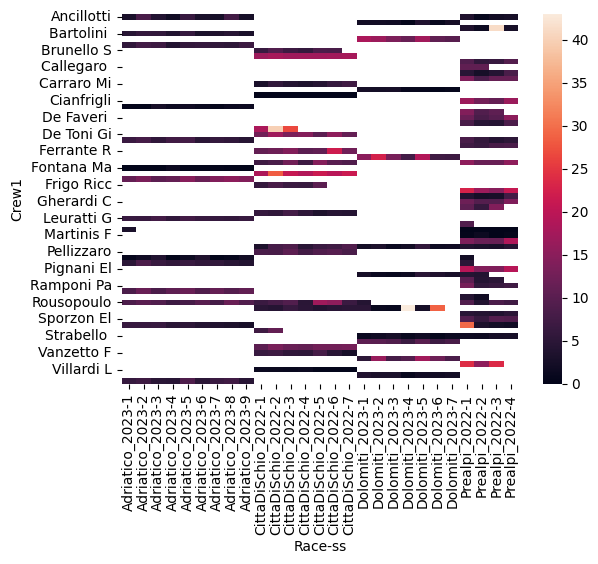

In [9]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.savefig("Heatmap_ALL.png")

In [10]:
rouso = ss_times_F2[ss_times_F2['Crew1'].str.contains('Rou')]
rouso

,Crew1,Gr/Cl,time_SS_sec,ss,Race,cou,diff,diff%,RaceSS,SS.
7,Rousopoulo,Rally4,460.1,1,Adriatico_2023,8,36.7,8.667926,Adriatico_2023 1,1
21,Rousopoulo,Rally4,435.1,2,Adriatico_2023,7,39.3,9.929257,Adriatico_2023 2,2
35,Rousopoulo,Rally4,295.5,3,Adriatico_2023,7,24.8,9.161433,Adriatico_2023 3,3
48,Rousopoulo,Rally4,449.8,4,Adriatico_2023,6,28.5,6.764776,Adriatico_2023 4,4
63,Rousopoulo,Rally4,411.7,5,Adriatico_2023,7,30.5,8.001049,Adriatico_2023 5,5
77,Rousopoulo,Rally4,296.3,6,Adriatico_2023,7,26.7,9.903561,Adriatico_2023 6,6
91,Rousopoulo,Rally4,445.4,7,Adriatico_2023,7,32.3,7.818930,Adriatico_2023 7,7
105,Rousopoulo,Rally4,426.6,8,Adriatico_2023,7,44.4,11.616954,Adriatico_2023 8,8
119,Rousopoulo,Rally4,293.4,9,Adriatico_2023,7,24.8,9.233060,Adriatico_2023 9,9
136,Rousopoulo,Rally4,564.3,1,CittaDiSchio_2022,10,35.4,6.693137,CittaDiSchio_2022 1,1


In [11]:
prealpi = ss_times_F2[ss_times_F2['Race']=='Prealpi_2022']
#prealpi_R = prealpi[prealpi['Crew1'].str.contains('Rou')]
prealpi_R = rouso[ss_times_F2['Race']=='Prealpi_2022']
Adriatico = ss_times_F2[ss_times_F2['Race']=='Adriatico_2023']
Adriatico_R = rouso[ss_times_F2['Race']=='Adriatico_2023']
CittaDiSchio_2022a = ss_times_F2[ss_times_F2['Race']=='CittaDiSchio_2022']
CittaDiSchio_R = rouso[ss_times_F2['Race']=='CittaDiSchio_2022']
Dolomiti = ss_times_F2[ss_times_F2['Race']=='Dolomiti_2023']
Dolomiti_R = rouso[ss_times_F2['Race']=='Dolomiti_2023']


C:\Users\ilias\AppData\Local\Temp\ipykernel_14600\4031164156.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prealpi_R = rouso[ss_times_F2['Race']=='Prealpi_2022']
C:\Users\ilias\AppData\Local\Temp\ipykernel_14600\4031164156.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Adriatico_R = rouso[ss_times_F2['Race']=='Adriatico_2023']
C:\Users\ilias\AppData\Local\Temp\ipykernel_14600\4031164156.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CittaDiSchio_R = rouso[ss_times_F2['Race']=='CittaDiSchio_2022']
C:\Users\ilias\AppData\Local\Temp\ipykernel_14600\4031164156.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dolomiti_R = rouso[ss_times_F2['Race']=='Dolomiti_2023']


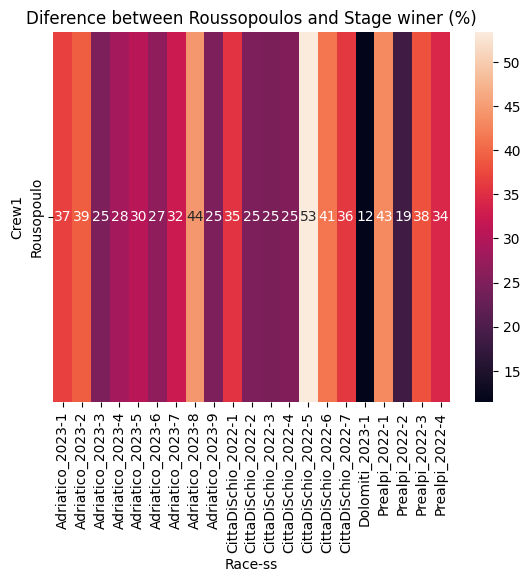

In [12]:
ss_times_Rou = pd.pivot_table(rouso, values='diff', 
                                index='Crew1', 
                                columns=['Race', 'ss'])
Heatmap_Rou = sns.heatmap(ss_times_Rou,annot=True)
plt.title('Diference between Roussopoulos and Stage winer (%)')
plt.savefig("Heatmap_Rous.png")

# Γράφημα με το θηκόγραμμα όλων των Ειδικών Διαδρομών και τον χρόνο του Ρουσόπουλου (κόκκινο σημέιο)

ValueError: array length 1 does not match index length 21

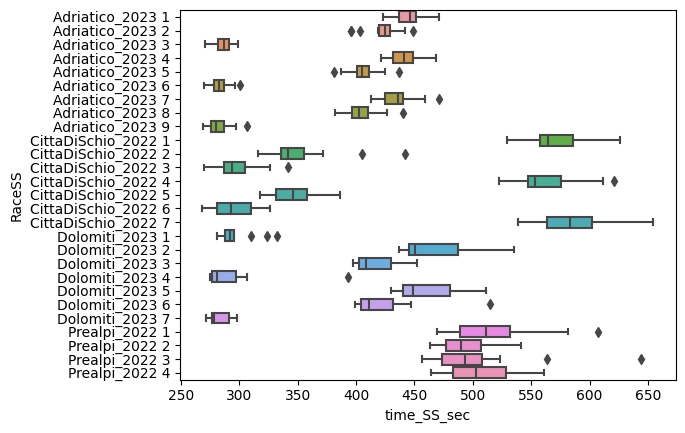

In [13]:
bplt=sns.boxplot( x=ss_times_F2["time_SS_sec"], y=ss_times_F2["RaceSS"])
rsplt = sns.scatterplot( x=["time_SS_sec"], y=rouso["RaceSS"], color = 'red', s=70).set(title='Θηκόγραμμα και χρόνοι Ρουσόπουλου')
plt.savefig("boxplot.png")

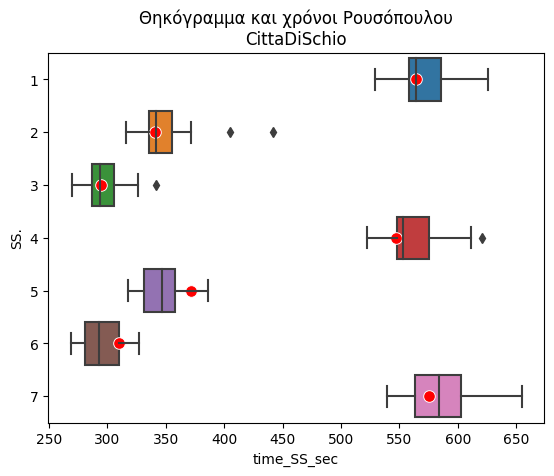

In [14]:
bplt2=sns.boxplot( x=CittaDiSchio_2022a["time_SS_sec"], y=CittaDiSchio_2022a["SS."])
rsplt2 = sns.scatterplot( x=CittaDiSchio_R["time_SS_sec"], y=CittaDiSchio_R["SS."], color = 'red', s=70).set(title='Θηκόγραμμα και χρόνοι Ρουσόπουλου\nCittaDiSchio')
plt.savefig("CittaDiSchio.jpg")

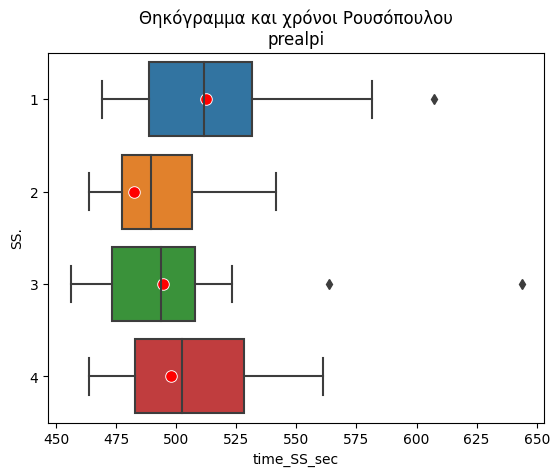

In [15]:
bplt3=sns.boxplot( x=prealpi["time_SS_sec"], y=prealpi["SS."])
rsplt3 = sns.scatterplot( x=prealpi_R["time_SS_sec"], y=prealpi_R["SS."], color = 'red', s=70).set(title='Θηκόγραμμα και χρόνοι Ρουσόπουλου\nprealpi')
plt.savefig("prealpi.jpg")

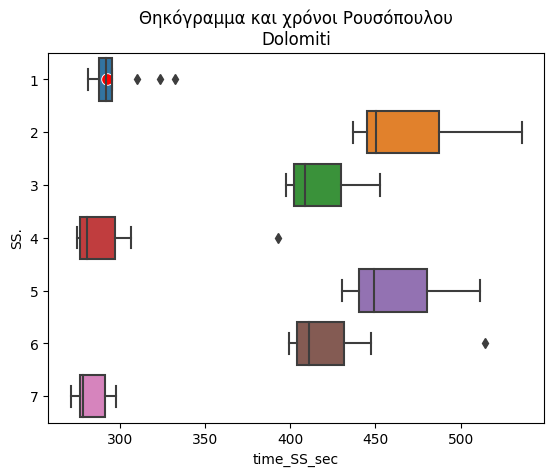

In [16]:
bplt4=sns.boxplot( x=Dolomiti["time_SS_sec"], y=Dolomiti["SS."])
rsplt4 = sns.scatterplot( x=Dolomiti_R["time_SS_sec"], y=Dolomiti_R["SS."], color = 'red', s=70).set(title='Θηκόγραμμα και χρόνοι Ρουσόπουλου\nDolomiti')
plt.savefig("Dolomiti.jpg")

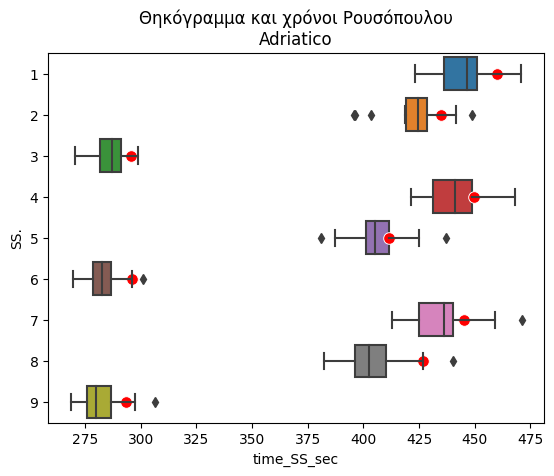

In [17]:
bplt4=sns.boxplot( x=Adriatico["time_SS_sec"], y=Adriatico["SS."])
rsplt4 = sns.scatterplot( x=Adriatico_R["time_SS_sec"], y=Adriatico_R["SS."], color = 'red', s=70).set(title='Θηκόγραμμα και χρόνοι Ρουσόπουλου\nAdriatico')
plt.savefig("Adriatico.jpg")

In [18]:
Adriatico

,Crew1,Gr/Cl,time_SS_sec,ss,Race,cou,diff,diff%,RaceSS,SS.
0,Cogni Gior,Rally4,424.4,1,Adriatico_2023,1,1.0,0.236183,Adriatico_2023 1,1
1,Marchioro,Rally4,436.3,1,Adriatico_2023,2,12.9,3.046764,Adriatico_2023 1,1
2,Ancillotti,Rally4,436.5,1,Adriatico_2023,3,13.1,3.094001,Adriatico_2023 1,1
3,Bartolini,Rally4,442.3,1,Adriatico_2023,4,18.9,4.463864,Adriatico_2023 1,1
4,Stella Man,Rally4,449.7,1,Adriatico_2023,5,26.3,6.211620,Adriatico_2023 1,1
...,...,...,...,...,...,...,...,...,...,...
122,Pesavento,Rally4 Under 25,274.4,9,Adriatico_2023,10,5.8,2.159345,Adriatico_2023 9,9
123,Pierulivo,Rally4 Under 25,279.3,9,Adriatico_2023,11,10.7,3.983619,Adriatico_2023 9,9
124,Zorzi Ales,Rally4/R2,280.8,9,Adriatico_2023,12,12.2,4.542070,Adriatico_2023 9,9
125,Ricciardi,Rally4/R2,297.6,9,Adriatico_2023,13,29.0,10.796724,Adriatico_2023 9,9


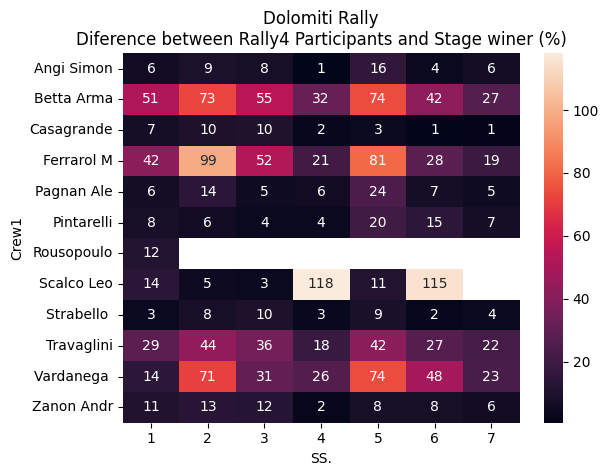

In [36]:
ss_times_Dolomiti = pd.pivot_table(Dolomiti, values='diff', 
                                index='Crew1', 
                                columns=['SS.'])
Heatmap_Dolomiti = sns.heatmap(ss_times_Dolomiti, annot=True, fmt=',.0f')
plt.title('Dolomiti Rally\nDiference between Rally4 Participants and Stage winer (%)')
plt.savefig("Dolomiti_Rally4.jpg")

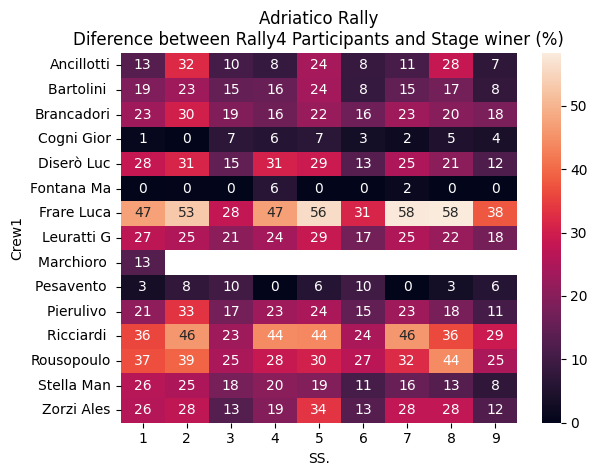

In [35]:
ss_times_Adriatico = pd.pivot_table(Adriatico, values='diff', 
                                index='Crew1', 
                                columns=['SS.'])
Heatmap_Adriatico = sns.heatmap(ss_times_Adriatico, annot=True, fmt=',.0f')
plt.title('Adriatico Rally\nDiference between Rally4 Participants and Stage winer (%)')
plt.savefig("Adriatico_Rally4.jpg")

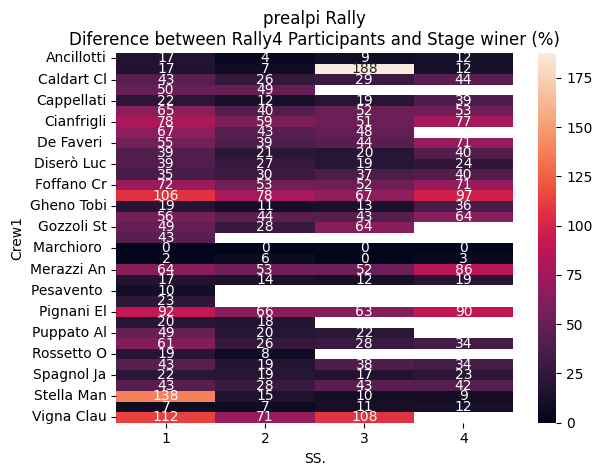

In [34]:
ss_times_prealpi = pd.pivot_table(prealpi, values='diff', 
                                index='Crew1', 
                                columns=['SS.'])
Heatmap_prealpi = sns.heatmap(ss_times_prealpi, annot=True, fmt=',.0f')
plt.title('prealpi Rally\nDiference between Rally4 Participants and Stage winer (%)')
#plt.figure(figsize = (20, 20))
plt.savefig("prealpi_Rally4.jpg")

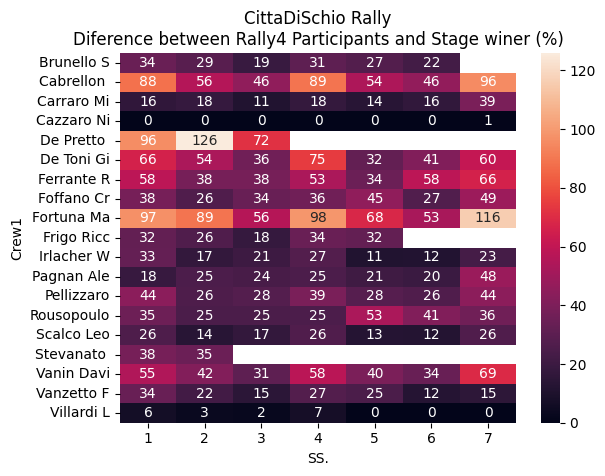

In [39]:
ss_times_CittaDiSchio = pd.pivot_table(CittaDiSchio_2022a, values='diff', 
                                index='Crew1', 
                                columns=['SS.'])
Heatmap_CittaDiSchio = sns.heatmap(ss_times_CittaDiSchio, annot=True, fmt=',.0f')
plt.title('CittaDiSchio Rally\nDiference between Rally4 Participants and Stage winer (%)')
#plt.figure(figsize = (20, 20))
plt.savefig("CittaDiSchio_Rally4.jpg")